DATASET consist fire_cases of forest divided into two regions, after DATA CLEANING again data merged into one set and performed stats operations to remove outliers and various relation has been observed

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings as wr
wr.filterwarnings('ignore')
from scipy import stats
# import plotly.express as px

In [2]:
df=pd.read_csv(r"C:\Users\SUMIT PAL\DATASETS_for_EDA\Algerian_forest_fires_dataset_UPDATE.csv",header=1)

In [3]:
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire
242,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
243,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
244,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.0+ KB


In [5]:
df.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
count,246,245,245,245,245,245,245,245,245,245,245,245,245,244
unique,33,5,2,20,63,19,40,174,167,199,107,175,128,9
top,01,07,2012,35,64,14,0,88.9,7.9,8,1.1,3,0.4,fire
freq,8,62,244,29,10,43,133,8,5,5,8,5,12,131


In [6]:
df.columns    # 14 COLUMNS

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  '],
      dtype='object')

In [7]:
#  for cl in df.columns:
#         print(dtype(cl))

In [8]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [9]:
df.tail()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
241,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire
242,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
243,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
244,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire
245,30,09,2012,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,not fire


In [10]:
df.dtypes

day            object
month          object
year           object
Temperature    object
 RH            object
 Ws            object
Rain           object
FFMC           object
DMC            object
DC             object
ISI            object
BUI            object
FWI            object
Classes        object
dtype: object

In [11]:
df.iloc[122]

day            Sidi-Bel Abbes Region Dataset
month                                    NaN
year                                     NaN
Temperature                              NaN
 RH                                      NaN
 Ws                                      NaN
Rain                                     NaN
FFMC                                     NaN
DMC                                      NaN
DC                                       NaN
ISI                                      NaN
BUI                                      NaN
FWI                                      NaN
Classes                                  NaN
Name: 122, dtype: object

In [12]:
df[df.isna().any(axis=1)]
# why axis=0 not working?

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


In [13]:
df.shape

(246, 14)

In [14]:
df.loc[120:124]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
120,29,09,2012,26,80,16,1.8,47.4,2.9,7.7,0.3,3,0.1,not fire
121,30,09,2012,25,78,14,1.4,45,1.9,7.5,0.2,2.4,0.1,not fire
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
124,01,06,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire


In [15]:
# upto 121...consist (BEJIA REGION)
#122......heading
#123......column header for BEL-ABBES REGION

## separating & creating dataset: df2

In [16]:
df2=df.loc[123:]

In [17]:
df2    # DATASET divided in 2 parts

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
123,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
124,01,06,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire
125,02,06,2012,30,73,13,4,55.7,2.7,7.8,0.6,2.9,0.2,not fire
126,03,06,2012,29,80,14,2,48.7,2.2,7.6,0.3,2.6,0.1,not fire
127,04,06,2012,30,64,14,0,79.4,5.2,15.4,2.2,5.6,1,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire
242,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
243,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
244,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire


In [18]:
df2.shape

(123, 14)

In [19]:
df.drop(index=np.arange(122,246),inplace=True)
# here values of df2 has been dropped from df1

In [20]:
df2.shape

(123, 14)

In [21]:
df.shape

(122, 14)

In [22]:
df.tail()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
117,26,09,2012,31,54,11,0,82,6,16.3,2.5,6.2,1.7,not fire
118,27,09,2012,31,66,11,0,85.7,8.3,24.9,4,9,4.1,fire
119,28,09,2012,32,47,14,0.7,77.5,7.1,8.8,1.8,6.8,0.9,not fire
120,29,09,2012,26,80,16,1.8,47.4,2.9,7.7,0.3,3,0.1,not fire
121,30,09,2012,25,78,14,1.4,45,1.9,7.5,0.2,2.4,0.1,not fire


In [23]:
df2

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
123,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
124,01,06,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire
125,02,06,2012,30,73,13,4,55.7,2.7,7.8,0.6,2.9,0.2,not fire
126,03,06,2012,29,80,14,2,48.7,2.2,7.6,0.3,2.6,0.1,not fire
127,04,06,2012,30,64,14,0,79.4,5.2,15.4,2.2,5.6,1,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire
242,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
243,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
244,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire


In [24]:
df2=df2.drop(index=[123])
df2

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
124,01,06,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire
125,02,06,2012,30,73,13,4,55.7,2.7,7.8,0.6,2.9,0.2,not fire
126,03,06,2012,29,80,14,2,48.7,2.2,7.6,0.3,2.6,0.1,not fire
127,04,06,2012,30,64,14,0,79.4,5.2,15.4,2.2,5.6,1,not fire
128,05,06,2012,32,60,14,0.2,77.1,6,17.6,1.8,6.5,0.9,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire
242,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
243,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
244,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire


## RESETING INDEX of df & df2:

In [25]:
df.reset_index(inplace=True)
df2.reset_index(inplace=True)

In [26]:
df    # now index values have been reset

,index,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,117,26,09,2012,31,54,11,0,82,6,16.3,2.5,6.2,1.7,not fire
118,118,27,09,2012,31,66,11,0,85.7,8.3,24.9,4,9,4.1,fire
119,119,28,09,2012,32,47,14,0.7,77.5,7.1,8.8,1.8,6.8,0.9,not fire
120,120,29,09,2012,26,80,16,1.8,47.4,2.9,7.7,0.3,3,0.1,not fire


In [27]:
df.tail()

,index,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
117,117,26,09,2012,31,54,11,0,82,6,16.3,2.5,6.2,1.7,not fire
118,118,27,09,2012,31,66,11,0,85.7,8.3,24.9,4,9,4.1,fire
119,119,28,09,2012,32,47,14,0.7,77.5,7.1,8.8,1.8,6.8,0.9,not fire
120,120,29,09,2012,26,80,16,1.8,47.4,2.9,7.7,0.3,3,0.1,not fire
121,121,30,09,2012,25,78,14,1.4,45,1.9,7.5,0.2,2.4,0.1,not fire


### Here still one value in class is na()
#### will try to fill it as per trend

In [28]:
df2[df2.isna().any(axis=1)]

,index,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
43,167,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


In [29]:
df2.iloc[42:48]

,index,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
42,166,13,07,2012,39,45,13,0.6,85.2,11.3,10.4,4.2,10.9,4.7,fire
43,167,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN
44,168,15,07,2012,34,45,17,0,90.5,18,24.1,10.9,17.7,14.1,fire
45,169,16,07,2012,31,83,17,0,84.5,19.4,33.1,4.7,19.2,7.3,fire
46,170,17,07,2012,32,81,17,0,84.6,21.1,42.3,4.7,20.9,7.7,fire
47,171,18,07,2012,33,68,15,0,86.1,23.9,51.6,5.2,23.9,9.1,fire


In [30]:
# df2['FWI'].iloc[43]="np.nan()"

In [31]:
df2['Classes  '].mode()

0    fire   
dtype: object

In [32]:
df2['Classes  '].iloc[43]='fire'
df2.iloc[43]

index              167
day                 14
month               07
year              2012
Temperature         37
 RH                 37
 Ws                 18
Rain               0.2
FFMC              88.9
DMC               12.9
DC              14.6 9
ISI               12.5
BUI               10.4
FWI            fire   
Classes           fire
Name: 43, dtype: object

In [33]:
df2['FWI'].iloc[43]=8.5

In [34]:
df2['FWI']=df2['FWI'].astype('float')
# df2['FWI']=df2['FWI'].astype('int')

In [35]:
df2['FWI'].mode()

0    0.4
1    0.8
dtype: float64

In [36]:
df2['FWI'].iloc[43]

8.5

<AxesSubplot:xlabel='Classes  ', ylabel='count'>

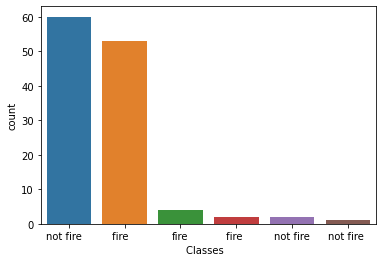

In [37]:
sns.countplot(x="Classes  ",data=df)

In [38]:
df

,index,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,117,26,09,2012,31,54,11,0,82,6,16.3,2.5,6.2,1.7,not fire
118,118,27,09,2012,31,66,11,0,85.7,8.3,24.9,4,9,4.1,fire
119,119,28,09,2012,32,47,14,0.7,77.5,7.1,8.8,1.8,6.8,0.9,not fire
120,120,29,09,2012,26,80,16,1.8,47.4,2.9,7.7,0.3,3,0.1,not fire


In [39]:
df['Rain '].value_counts

<bound method IndexOpsMixin.value_counts of 0         0
1       1.3
2      13.1
3       2.5
4         0
       ... 
117       0
118       0
119     0.7
120     1.8
121     1.4
Name: Rain , Length: 122, dtype: object>

## here it is observed that some column are not accessible, therefore renamed/rectified:

In [40]:
df.columns

Index(['index', 'day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ',
       'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  '],
      dtype='object')

In [41]:
df.columns=['index', 'day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain',
            'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes']
df2.columns=['index', 'day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain',
            'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes']

In [42]:
df['Classes'].value_counts()

not fire       60
fire           53
fire            4
fire            2
not fire        2
not fire        1
Name: Classes, dtype: int64

## data contain irregular input formats, using loop converted into standard type:

In [43]:
df.Classes.value_counts().index       #different string formats are included here

Index(['not fire   ', 'fire   ', 'fire', 'fire ', 'not fire', 'not fire '], dtype='object')

In [44]:
l1=[]
n=0
f=0
for i in df['Classes']:
    if(i[0]=='n'):
        i=i.replace(i,"not fire")
        n=n+1
        l1.append(i)
    else:
        i=i.replace(i,"FIRE")
        f=f+1
        l1.append(i)
print(l1)
print("no. of fire: ",f)
print("no. of NOT fire: ",n)
df['new_Classes']=l1

['not fire', 'not fire', 'not fire', 'not fire', 'not fire', 'FIRE', 'FIRE', 'FIRE', 'not fire', 'not fire', 'FIRE', 'FIRE', 'not fire', 'not fire', 'not fire', 'not fire', 'not fire', 'not fire', 'not fire', 'not fire', 'FIRE', 'not fire', 'FIRE', 'FIRE', 'FIRE', 'FIRE', 'FIRE', 'FIRE', 'not fire', 'FIRE', 'not fire', 'not fire', 'not fire', 'not fire', 'FIRE', 'FIRE', 'not fire', 'FIRE', 'not fire', 'not fire', 'not fire', 'not fire', 'not fire', 'not fire', 'not fire', 'not fire', 'FIRE', 'FIRE', 'FIRE', 'FIRE', 'FIRE', 'not fire', 'not fire', 'not fire', 'FIRE', 'FIRE', 'FIRE', 'FIRE', 'FIRE', 'FIRE', 'FIRE', 'not fire', 'not fire', 'not fire', 'FIRE', 'FIRE', 'FIRE', 'FIRE', 'not fire', 'FIRE', 'FIRE', 'FIRE', 'not fire', 'FIRE', 'FIRE', 'FIRE', 'FIRE', 'FIRE', 'FIRE', 'FIRE', 'FIRE', 'FIRE', 'FIRE', 'FIRE', 'FIRE', 'FIRE', 'FIRE', 'FIRE', 'FIRE', 'FIRE', 'not fire', 'not fire', 'not fire', 'not fire', 'not fire', 'not fire', 'FIRE', 'not fire', 'not fire', 'not fire', 'not fire',

In [45]:
df

,index,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,new_Classes
0,0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,not fire
1,1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,not fire
2,2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,not fire
3,3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,not fire
4,4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,117,26,09,2012,31,54,11,0,82,6,16.3,2.5,6.2,1.7,not fire,not fire
118,118,27,09,2012,31,66,11,0,85.7,8.3,24.9,4,9,4.1,fire,FIRE
119,119,28,09,2012,32,47,14,0.7,77.5,7.1,8.8,1.8,6.8,0.9,not fire,not fire
120,120,29,09,2012,26,80,16,1.8,47.4,2.9,7.7,0.3,3,0.1,not fire,not fire


In [46]:
df2['Classes'].value_counts().index           # how to fetch types of values in feature

Index(['fire   ', 'not fire   ', 'not fire     ', 'fire', 'not fire    '], dtype='object')

In [47]:
# df2
l2=[]
n=0
f=0
for i in df2['Classes']:
    if(i[0]=='f'):                              # here an error occured because at index=43 value was 'NaN'.
        i=i.replace(i,"FIRE")            #So i moved to previous cell and fill that as "fire" as it was mentioned, but need to fill "FIW"
        n=n+1
        l2.append(i)
    else:
        i=i.replace(i,"not fire")
        f=f+1
        l2.append(i)
print(l2)
print("no. of fire: ",f)
print("no. of NOT fire: ",n)
df2['new_Classes']=l2

['not fire', 'not fire', 'not fire', 'not fire', 'not fire', 'FIRE', 'FIRE', 'not fire', 'not fire', 'FIRE', 'FIRE', 'FIRE', 'not fire', 'not fire', 'not fire', 'not fire', 'not fire', 'not fire', 'not fire', 'not fire', 'FIRE', 'not fire', 'not fire', 'FIRE', 'FIRE', 'FIRE', 'FIRE', 'FIRE', 'FIRE', 'not fire', 'not fire', 'FIRE', 'FIRE', 'FIRE', 'FIRE', 'FIRE', 'FIRE', 'FIRE', 'FIRE', 'not fire', 'not fire', 'FIRE', 'FIRE', 'FIRE', 'FIRE', 'FIRE', 'FIRE', 'FIRE', 'FIRE', 'FIRE', 'FIRE', 'FIRE', 'FIRE', 'not fire', 'not fire', 'not fire', 'not fire', 'FIRE', 'FIRE', 'FIRE', 'FIRE', 'not fire', 'FIRE', 'FIRE', 'FIRE', 'FIRE', 'not fire', 'not fire', 'FIRE', 'FIRE', 'FIRE', 'FIRE', 'FIRE', 'FIRE', 'FIRE', 'FIRE', 'FIRE', 'FIRE', 'FIRE', 'FIRE', 'FIRE', 'FIRE', 'FIRE', 'FIRE', 'FIRE', 'FIRE', 'FIRE', 'FIRE', 'not fire', 'FIRE', 'FIRE', 'FIRE', 'not fire', 'not fire', 'FIRE', 'not fire', 'not fire', 'not fire', 'FIRE', 'FIRE', 'FIRE', 'not fire', 'not fire', 'FIRE', 'FIRE', 'FIRE', 'FIRE',

In [48]:
df2['Classes'].value_counts()

fire             78
not fire         41
not fire          1
fire              1
not fire          1
Name: Classes, dtype: int64

In [49]:
df2['new_Classes'].value_counts()

FIRE        79
not fire    43
Name: new_Classes, dtype: int64

<AxesSubplot:xlabel='new_Classes', ylabel='count'>

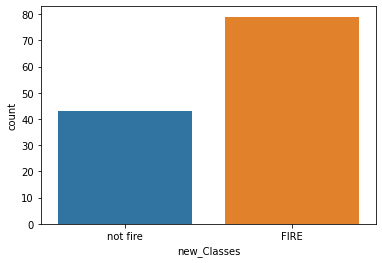

In [50]:
sns.countplot(x="new_Classes",data=df2)

<AxesSubplot:xlabel='new_Classes', ylabel='count'>

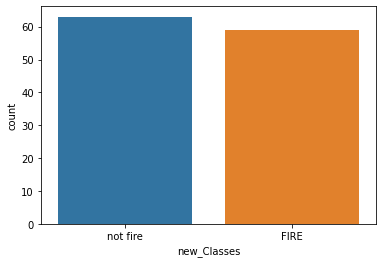

In [51]:
sns.countplot(x="new_Classes",data=df)

## df2=1(sidi bel) region have more fire cases , approx 100% more than not fire:
## whereas bejia(df) has approx. similar values

In [52]:
df.loc[:122,'region']=0                     # BEJIA region
df2.loc[:122,'region']=1                    # SIDI BEL region

# dataset merged into one called df3

In [53]:
df['FWI']=df['FWI'].astype('float')
df3 = df.merge(df2,how="outer")

In [54]:
print("length of new datset: ",len(df3))
# print(df3.head())
# df3.tail()
df3.tail()

length of new datset:  244


,index,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,new_Classes,region
239,241,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire,FIRE,1
240,242,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0.0,not fire,not fire,1
241,243,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,not fire,1
242,244,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,not fire,1
243,245,30,09,2012,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,not fire,not fire,1


# converting data type into "float"  

In [55]:
df3['DC'].iloc[165]="14.69"    # this value was creating error during DATA TYPE_conversion (it was "14.6 9")

In [56]:
# df3.iloc[165]

In [57]:
l4=[]
for i in df3.columns[4:13]:
    l4.append(i)
print(l4)
for i in l4:
    df3[i]=df3[i].astype('float')

['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI']


In [58]:
# df3.drop('i',axis=1,inplace=True)

# Detection & Removal of outliers
## using boxplot

In [59]:
nm=[cn for cn in df3.columns if df3[cn].dtype != 'O']
nm=nm[1:-1]
nm

['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI']

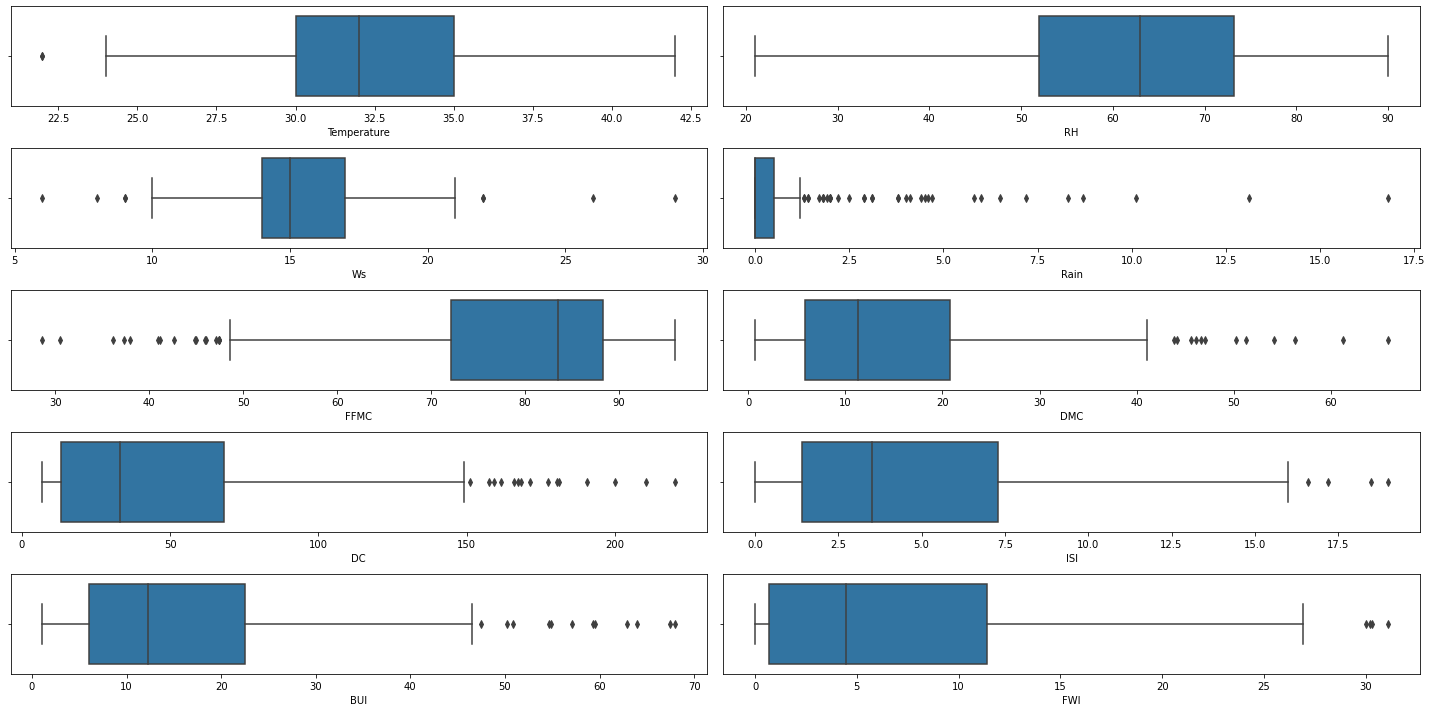

In [60]:
n=1
plt.figure(figsize=(20,10))
for i in nm:
    plt.subplot(5,2,n)
    n=n+1
    sns.boxplot(df3[i])
    plt.tight_layout()

## Detecting outliers using z-score

In [61]:
# np.abs used for absolute positive values
z_score=[]
for i in nm:
    z_score.append(np.abs(stats.zscore(df3[i]))) 
z_score

[0      0.874735
 1      0.874735
 2      1.702005
 3      1.977761
 4      1.426248
          ...   
 239    0.598979
 240    1.150492
 241    1.426248
 242    2.253517
 243    2.253517
 Name: Temperature, Length: 244, dtype: float64,
 0      0.332478
 1      0.063185
 2      1.350607
 3      1.821872
 4      1.013990
          ...   
 239    0.206109
 240    1.687225
 241    1.687225
 242    0.534449
 243    0.138786
 Name: RH, Length: 244, dtype: float64,
 0      0.889990
 1      0.892913
 2      2.316313
 3      0.892913
 4      0.176829
          ...   
 239    0.536333
 240    0.179752
 241    4.812379
 242    0.889990
 243    0.179752
 Name: Ws, Length: 244, dtype: float64,
 0      0.381223
 1      0.270307
 2      6.184192
 3      0.871719
 4      0.381223
          ...   
 239    0.381223
 240    1.823955
 241    0.130635
 242    0.331105
 243    0.280988
 Name: Rain, Length: 244, dtype: float64,
 0      0.851801
 1      0.942658
 2      2.151758
 3      3.444727
 4      0.914

In [62]:
threshold=3
for z in z_score:
    print(np.where(z>threshold))

(array([], dtype=int64),)
(array([], dtype=int64),)
(array([105, 237, 241], dtype=int64),)
(array([  2,  91,  92,  93, 105, 139], dtype=int64),)
(array([ 3, 93], dtype=int64),)
(array([ 89, 207, 208, 209], dtype=int64),)
(array([87, 88, 89], dtype=int64),)
(array([172, 187], dtype=int64),)
(array([ 87,  88,  89, 207, 208, 209], dtype=int64),)
(array([ 89, 172, 207, 208], dtype=int64),)


## Observation:


here we get row_numbers where value of z-score is greater than threshold for corresponding numerical feature.

Now we will calculate the IQR for each of numerical features.

In [63]:
feature_IQR=[]
for i in nm:
    Q1 = df3[i].quantile(0.25)
    Q3 = df3[i].quantile(0.75)
    IQR = Q3-Q1
    feature_IQR.append(IQR)

In [64]:
for i,IQR in zip(nm,feature_IQR):
    print(i,".............> ",IQR)

Temperature .............>  5.0
RH .............>  21.25
Ws .............>  3.0
Rain .............>  0.5
FFMC .............>  16.224999999999994
DMC .............>  14.95
DC .............>  54.87500000000001
ISI .............>  5.9
BUI .............>  16.525
FWI .............>  10.675


Now, lower_fence and upper_fence can be calculated using IQR to remove OUTLIERS in upcoming scenario.

lower_fence= Q1-1.5*IQR

upper_fence= Q3+1.5*IQR

# missing step: converting date,month & year in  'int' format

In [65]:
l4=[]
for i in df3.columns[:4]:
    l4.append(i)
print(l4)
for i in l4:
    df3[i]=df3[i].astype('int')

['index', 'day', 'month', 'year']


In [66]:
df3=df3.drop('Classes',axis=1)
df3.dtypes

index            int32
day              int32
month            int32
year             int32
Temperature    float64
RH             float64
Ws             float64
Rain           float64
FFMC           float64
DMC            float64
DC             float64
ISI            float64
BUI            float64
FWI            float64
new_Classes     object
region           int64
dtype: object

# Bivariate Analysis

## Correlation of numerical features

<AxesSubplot:>

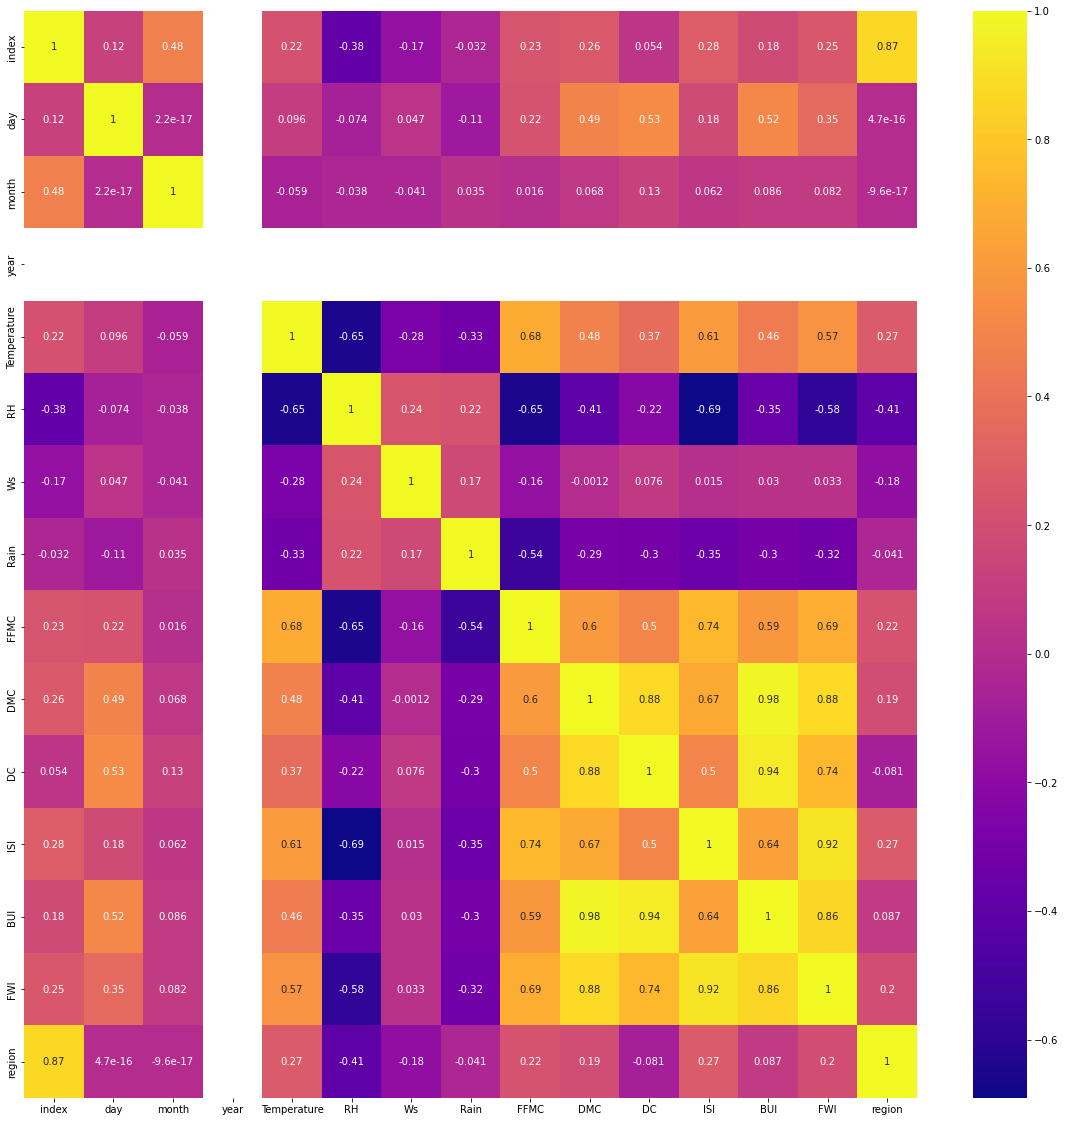

In [67]:
plt.figure(figsize=(20,20))
df3.corr()
sns.heatmap(df3.corr(),annot=True,cmap='plasma')

## Observations:

day,month & year are obselete here, highly correlation appears among 6 parameters _ ......[ 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI'].
lets find out other relation among these values

# very high positive correlation between
DMC and BUI

DC and BUI

FWI and ISI

## moderate positive correlation between
FFMC and ISI

FFMC and DMC

 FFMC and FWI 
 
 DMC and ISI
 
 DMC and DC 
 
 DMC and FWI
 
 DC and FWI
 
 ISI and FWI
 
 temprature and FFMC
 

## Negative correlation between:
 temprature and RH

 RH and FFMC

 RH and BUI

 RH and FWI

 RH and ISI

 Rain and FFMC

## Relationship based on categorical features:

<AxesSubplot:xlabel='region', ylabel='count'>

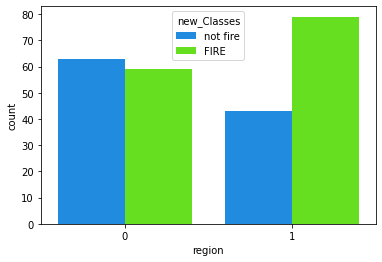

In [68]:
sns.countplot(x='region',data=df3,hue='new_Classes',palette='gist_rainbow_r')

0 refers BEJAIA & ............///.....1 is to SIDI bel-abbes region,.......in SIDI fire_cases are more

# Univariate Analysis

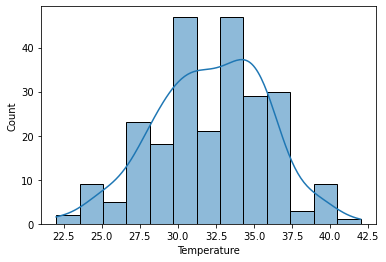

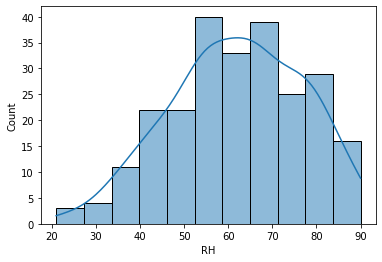

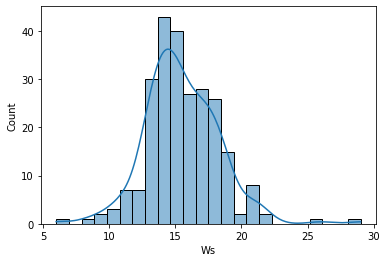

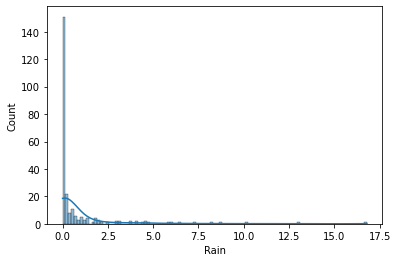

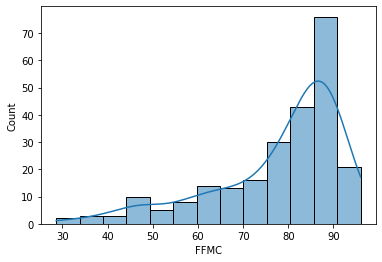

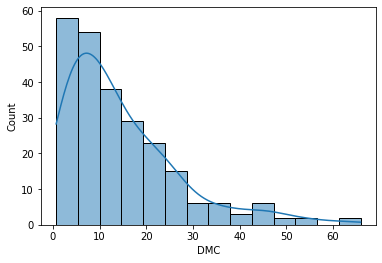

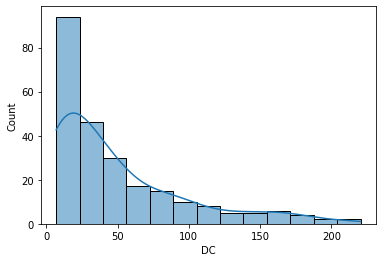

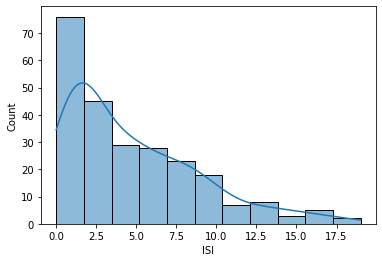

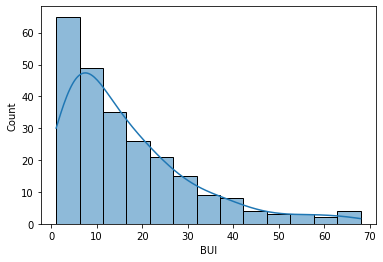

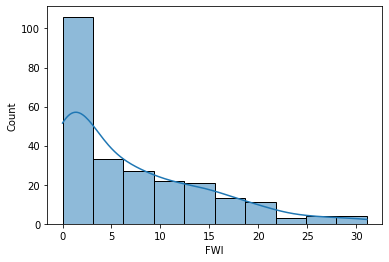

In [69]:
for i in nm:
    sns.histplot(data=df3,x=i,kde=True)
    plt.show()

## Observations:

We can observe that:


Temprature,RH and WS follows normal distribution.

FFMC is left_skewed

Rain,DMC,DC,ISI,BUI,FWI follows RIGHT_skewed


# Analytical Observations:

## What was the Highest Temprature and its duration? 

In [109]:
df3['Temperature'].max()

42.0

In [111]:
df3[df3['Temperature']==42.0]
#df3[df3['Temperature']==df3['Temperature'].max()]              # alternative solution

,index,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,new_Classes,region
199,201,17,8,2012,42.0,24.0,9.0,0.0,96.0,30.3,76.4,15.7,30.4,24.0,FIRE,1


,index,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,new_Classes,region
199,201,17,8,2012,42.0,24.0,9.0,0.0,96.0,30.3,76.4,15.7,30.4,24.0,FIRE,1


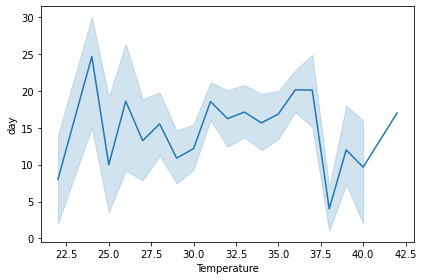

In [119]:
sns.lineplot(x='Temperature',data=df3,y='day')
plt.tight_layout()

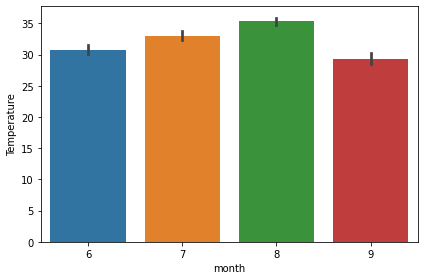

In [121]:
sns.barplot(y='Temperature',data=df3,x='month')
plt.tight_layout()

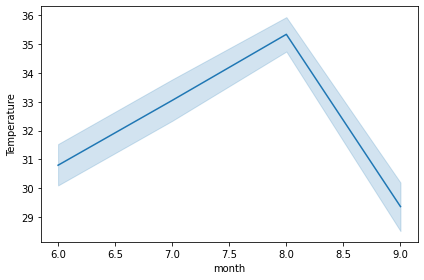

In [123]:
sns.lineplot(y='Temperature',data=df3,x='month')
plt.tight_layout()

In [133]:
df3.sort_values(by='Temperature',ascending=True)[['Temperature','day','month','year']]

,Temperature,day,month,year
105,22.0,14,9,2012
93,22.0,2,9,2012
243,24.0,30,9,2012
242,24.0,29,9,2012
106,24.0,15,9,2012
...,...,...,...,...
185,39.0,3,8,2012
198,40.0,16,8,2012
193,40.0,11,8,2012
184,40.0,2,8,2012


## Observation:
minimum temp.: 14/9/2012  (22.C)  ...........   maximum temp.: 17/8/2012  (42.C)

# When did it rain the most?

In [136]:
df3.sort_values(by='Rain',ascending=False)[['Rain','day','month','year']].head(1)

,Rain,day,month,year
91,16.8,31,8,2012


# Relation between fire and relative humidity(RH)?

<AxesSubplot:xlabel='RH', ylabel='new_Classes'>

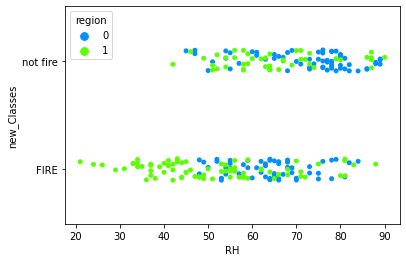

In [139]:
sns.stripplot(data=df3,x='RH',y='new_Classes',hue='region',palette='gist_rainbow_r')

1 signifies SIDI_BEL abbes

In SIDI_BEL RH is less thats' why FIRE observed.

# Relation between fire and Wind speed(Ws)?

<AxesSubplot:xlabel='Ws', ylabel='new_Classes'>

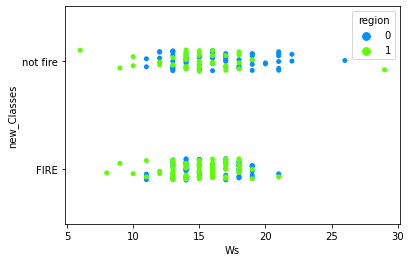

In [145]:
sns.stripplot(data=df3,x='Ws',y='new_Classes',hue='region',palette='gist_rainbow_r')

More cases of fire when windspeed is 12-18

# # Relation between fire and Rain?

<AxesSubplot:xlabel='Rain', ylabel='new_Classes'>

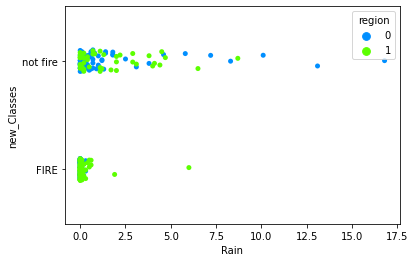

In [148]:
sns.stripplot(data=df3,x='Rain',y='new_Classes',hue='region',palette='gist_rainbow_r')

Rain is also a factor for FIRE.. & SIDI_BEL there is less precipitation

# Relation between fire and fire weather index(FWI)?

<AxesSubplot:xlabel='FWI', ylabel='new_Classes'>

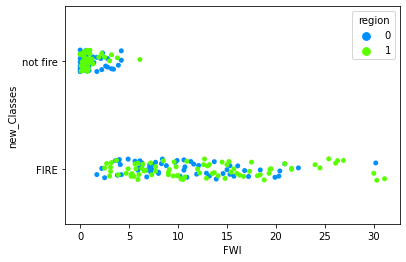

In [151]:
sns.stripplot(data=df3,x='FWI',y='new_Classes',hue='region',palette='gist_rainbow_r')

For values MORE than 20, less FIRE_cases

# Which day and month has most number of fire_cases?

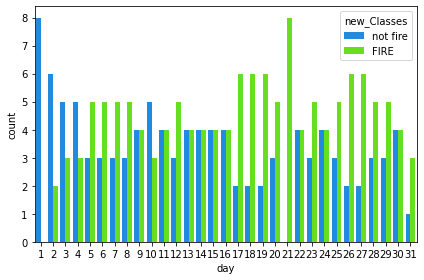

In [160]:
sns.countplot(data=df3,x='day',hue='new_Classes',palette='gist_rainbow_r')
plt.tight_layout()

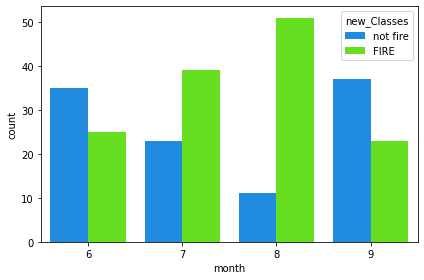

In [161]:
sns.countplot(data=df3,x='month',hue='new_Classes',palette='gist_rainbow_r')
plt.tight_layout()

21 day of month has max. fire_cases

2nd day of month has max. fire_cases

August has most fire cases

September has minimum fire cases
